In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.optimize import fmin_ncg

# Quadratic

In [5]:
def fquad(x):
    return (x[0]**4) + (x[0]*x[1]) + ((1 + x[1])**2)

In [6]:
def fquad_grad(x):
    d_x1 = 4*(x[0]**3) + x[1]
    d_x2 = x[0] + 2*(1 + x[1])
    grad = np.array([d_x1, d_x2])
    
    return grad

In [7]:
def fquad_hess(x):
    d2_x1_x1 = 12*(x[0]**2)
    d2_x1_x2 = 1
    d2_x2_x1 = 1
    d2_x2_x2 = 2
    hess = np.array([[d2_x1_x1, d2_x1_x2], [d2_x2_x1, d2_x2_x2]])
    
    return hess

In [8]:
x1 = np.array([1,2])

In [9]:
f_x = fquad(x1)
d_f_x = fquad_grad(x1)
d2_f_x = fquad_hess(x1)

In [10]:
d2_f_x

array([[12,  1],
       [ 1,  2]])

In [11]:
res = minimize(fquad, x1, method='Newton-CG',
               jac = fquad_grad, hess = fquad_hess,
               options = {'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -0.582445
         Iterations: 6
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 6


In [12]:
res.x

array([ 0.69588439, -1.34794219])

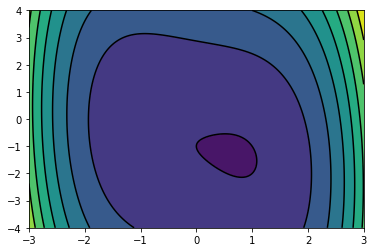

In [13]:
fig, ax = plt.subplots()

a = np.linspace(-3, 3, 700)
b = np.linspace(-4, 4, 700)

A, B = np.meshgrid(a, b)
c = np.array([A, B])

C = fquad(c)

ax.contourf(A, B, C)
ax.contour(A, B, C, colors = "black")

Optimization terminated successfully.
         Current function value: -0.582445
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 5


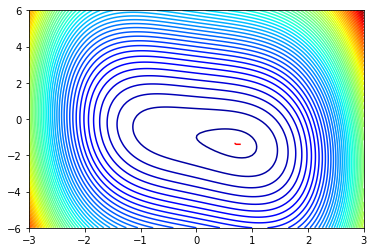

In [14]:
iter_n = 1
output = []
def callBack(x):
    global output
    global iter_n
    output.append([iter_n, x[0], x[1], fquad(x)])
    iter_n += 1

fmin_ncg(f = fquad, x0 = x1, fprime = fquad_grad, fhess = fquad_hess, maxiter = 100, full_output = True, retall = False, callback = callBack)

df = pd.DataFrame(output, columns = ['iteration','x1','x2','f(x1,x2)'])
df

x, y = np.meshgrid(np.linspace(-3,3,100),np.linspace(-6,6,100))
z = fquad([x,y])
plt.contour(x, y, z, 70, cmap = 'jet')
plt.plot(df.iloc[:,1],df.iloc[:,2],'r-')

# Non Quadratic

In [15]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [16]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [17]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [18]:
x2 = np.array([1,2,-1.08,0.998,0.7,-0.6])

In [19]:
res = minimize(rosen, x2, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 54
         Gradient evaluations: 54
         Hessian evaluations: 45
